In [74]:
#Import library
from qiskit import*
from qiskit import Aer
from qiskit.visualization import plot_histogram

# Task 8

# Function to implement these 9 possible to the circuit - one CCX

In [75]:
def quatum_func(i):
    qr_i = QuantumRegister(2,"input")
    qr_c = QuantumRegister(4,"constant")
    qr_o = QuantumRegister(1,"output")
    qc = QuantumCircuit(qr_i,qr_c,qr_o)
    qc.h(qr_i[0])
    qc.h(qr_i[1])
    qc.x(qr_c[1])
    qc.x(qr_c[3])
    if(i == 0):# 000 (a,b,c)
        qc.ccx(qr_i[0],qr_i[1],qr_o)
    elif(i == 1):# 010 (a,0,c)
        qc.ccx(qr_i[0],qr_c[0],qr_o)
    elif(i == 2):# 101 (a,1,c)
        qc.ccx(qr_i[0],qr_c[3],qr_o)
    elif(i == 3):# 001 (0,b,c)
        qc.ccx(qr_c[0],qr_i[1],qr_o)
    elif(i == 4):# 011 (0,0,c)
        qc.ccx(qr_c[0],qr_c[2],qr_o)
    elif(i == 5):#111 (0,1,c)
        qc.ccx(qr_c[0],qr_c[3],qr_o)
    elif(i == 6):# 100 (1,b,c)
        qc.ccx(qr_c[1],qr_i[1],qr_o)
    elif(i == 7):# 110 (1,1,c)
        qc.ccx(qr_c[1],qr_c[3],qr_o)
    elif(i == 8):#111 (1,0,c)
        qc.ccx(qr_c[1],qr_c[2],qr_o)
        
    return qc

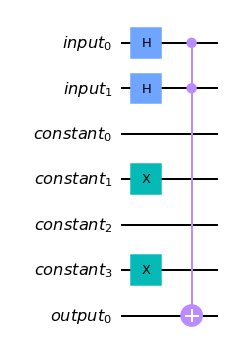

In [76]:
qc = quatum_func(0)
qc.draw('mpl')

# Function to implement these 9^4 possible to the circuit - four CCX

In [77]:
def quantum_func_1ccx(qc, qr_i, qr_c,qr_o, i):
    if(i[0] == 0):# 000 (a,b,c)
        qc.ccx(qr_i[0],qr_i[1],qr_o)
    elif(i[0] == 1):# 010 (a,0,c)
        qc.ccx(qr_i[0],qr_c[0],qr_o)
    elif(i[0] == 2):# 101 (a,1,c)
        qc.ccx(qr_i[0],qr_c[3],qr_o)
    elif(i[0] == 3):# 001 (0,b,c)
        qc.ccx(qr_c[0],qr_i[1],qr_o)
    elif(i[0] == 4):# 011 (0,0,c)
        qc.ccx(qr_c[0],qr_c[2],qr_o)
    elif(i[0] == 5):#111 (0,1,c)
        qc.ccx(qr_c[0],qr_c[3],qr_o)
    elif(i[0] == 6):# 100 (1,b,c)
        qc.ccx(qr_c[1],qr_i[1],qr_o)
    elif(i[0] == 7):# 110 (1,1,c)
        qc.ccx(qr_c[1],qr_c[3],qr_o)
    elif(i[0] == 8):#111 (1,0,c)
        qc.ccx(qr_c[1],qr_c[2],qr_o)
    return qc

In [78]:
def quantum_func_1ccx_2(qc, qr_i, qr_c, qr_oi, qr_o, arr):
    if(arr[0] == 0):# 000 (a,b,c)
        if(arr[1] == 0): # input is still a
            a = qr_i[0]
        elif(arr[1] == 1): # input is result of first ccx
            a = qr_oi[0]
        elif(arr[1] == 2): # input is result after 2 ccx
            a = qr_oi[1]
        elif(arr[1] == 3): # input is result after 3 ccx
            a = qr_oi[2]
            
        if(arr[2] == 0): # input is still b
            b = qr_i[1]
        elif(arr[2] == 1): # input is result of first ccx
            a = qr_oi[0]
        elif(arr[2] == 2): # input is result after 2 ccx
            b = qr_oi[1]
        elif(arr[2] == 3): # input is result after 3 ccx
            b = qr_oi[2]
        qc.ccx(a,b,qr_o)
        
    elif(arr[0] == 1):# 010 (a,0,c)
        if(arr[1] == 0):
            a = qr_i[0]
        elif(arr[1] == 1): 
            a = qr_oi[0]
        elif(arr[1] == 2): 
            a = qr_oi[1]
        elif(arr[1] == 3):
            a = qr_oi[2]
        qc.ccx(a,qr_c[0],qr_o)
        
    elif(arr[0] == 2):# 101 (a,1,c)
        if(arr[1] == 0):
            a = qr_i[0]
        elif(arr[1] == 1): 
            a = qr_oi[0]
        elif(arr[1] == 2): 
            a = qr_oi[1]
        elif(arr[1] == 3):
            a = qr_oi[2]
        qc.ccx(a,qr_c[3],qr_o)
        
    elif(arr[0] == 3):# 001 (0,b,c)
        if(arr[2] == 0):
            b = qr_i[1]
        elif(arr[2] == 1): 
            a = qr_oi[0]
        elif(arr[2] == 2):
            b = qr_oi[1]
        elif(arr[2] == 3):
            b = qr_oi[2]        
        qc.ccx(qr_c[0],b,qr_o)
        
    elif(arr[0] == 4):# 011 (0,0,c)
        qc.ccx(qr_c[0],qr_c[2],qr_o)
        
    elif(arr[0] == 5):#111 (0,1,c)
        qc.ccx(qr_c[0],qr_c[3],qr_o)
        
    elif(arr[0] == 6):# 100 (1,b,c)
        if(arr[2] == 0):
            b = qr_i[1]
        elif(arr[2] == 1): 
            a = qr_oi[0]
        elif(arr[2] == 2):
            b = qr_oi[1]
        elif(arr[2] == 3):
            b = qr_oi[2]
        qc.ccx(qr_c[1],b,qr_o)
        
    elif(arr[0] == 7):# 110 (1,1,c)
        qc.ccx(qr_c[1],qr_c[3],qr_o)
        
    elif(arr[0] == 8):#111 (1,0,c)
        qc.ccx(qr_c[1],qr_c[2],qr_o)
    return qc

In [79]:
def quantum_func_4ccx(arr):
    qr_i = QuantumRegister(2,"input")
    qr_c = QuantumRegister(4,"constant")
    qr_o = QuantumRegister(4,"output") # 4 output in which q_0 is output of first ccx, q_1 is output after two ccx,...
    qc = QuantumCircuit(qr_i,qr_c,qr_o)
    qc.h(qr_i[0])
    qc.h(qr_i[1])
    qc.x(qr_c[1])
    qc.x(qr_c[3])
    quantum_func_1ccx(qc,qr_i,qr_c,qr_o[0],arr[0])
    qc.cx(qr_o[0],qr_o[1])
    quantum_func_1ccx_2(qc,qr_i,qr_c,qr_o,qr_o[1],arr[1])
    qc.cx(qr_o[1],qr_o[2])
    quantum_func_1ccx_2(qc,qr_i,qr_c,qr_o,qr_o[2],arr[2])
    qc.cx(qr_o[2],qr_o[3])
    quantum_func_1ccx_2(qc,qr_i,qr_c,qr_o,qr_o[3],arr[3])
    # final result is qr_0[3](output_3) as I can copy the state of the result 
    return qc

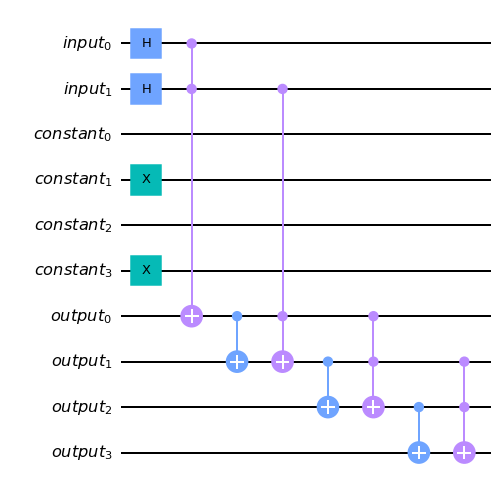

In [80]:
arr =[[0],[0,1,0],[0,1,2],[0,2,3]] 
# incase of duplicate quibt, for the 2nd gate scenario, you can use the result of after two ccx (output_1) as the input
# Same for 3rd gate and 4th gate scenario, you can use the result of after threee ccx (output_2) as the input of 3rd gate ,...
qc = quantum_func_4ccx(arr)
qc.draw('mpl')